# Visualización de datos usando las librerias de python _pandas_ y _seaborn_

Primero preparamos el notebook e importamos las librerías correspondientes.

El módulo _seaborn_ es un módulo relativamente nuevo, por lo que puede ser un poco complicado de instalar dependiendo la distribución de linux que uses. En cualquier modo, se puede usar pip para instalar la versión mas reciente.

    $ pip install -U seaborn


In [8]:
%matplotlib inline
# Importamos los clásicos
import numpy as np
import matplotlib.pylab as plt
# Importamos los módulos más especializados
import pandas as pd
import seaborn as sns


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Scatter plots

Ahora vamos a usar _seaborn_ para hacer unos scatter plots de los datos de scores del sulfurscore.

_Seaborn_ tiene muchas funciones de conveniencia para hacér gráficas y permite hacer incluso regresiones lineales. Sin emabrgo no te dá los datos intermedios del análisis, por lo cual puede no ser necesariamente lo más útil.

Entonces, cargamos las tablas con metadatos en un _dataframe_ de _pandas_.

In [9]:
meta_df = pd.read_table('scores_metadata_completed.txt', index_col=0)

# Quitar human
mask1 = meta_df['env_package'] == 'human-gut'
mask2 = meta_df['env_package'] == 'human-associated'

# unir las máscaras
mask = mask1 | mask2
# invertir (esta operación solo funciona con arreglos binarios)
mask = ~mask

# aplicamos la mascara al dataframe
meta_df = meta_df[mask]

In [10]:
meta_df

,Length,SS,SS PFAM,SS Ox_Red,SS puf,SS SRa,biome,feature,material,env_package,location,latitude,longitude,depth
id,,,,,,,,,,,,,,
4524971.3,52,16.711,4.114,5.428,0.043,0.956,aquatic biome,microbial feature,sludge,wastewater|sludge,shenzhen xili,22,114,NaN
4557986.3,73,16.656,4.114,5.428,0.043,0.956,Tropical/Subtropical Desert Division (320),alkaline salt lake,surface water,microbial mat|biofilm,Cuatro Cienegas,26.848087,-102.141608,NaN
4443705.3,73,15.155,3.364,5.428,0.043,0.956,marine habitat,marine habitat,marine habitat,water,"coastal waters of a fjord close to Bergen, Norway",60.27,-5.22,NaN
4443717.3,76,14.730,2.505,5.428,0.043,0.956,marine habitat,marine habitat,marine habitat,water,NaN,NaN,NaN,NaN
4443716.3,77,14.328,2.505,5.428,0.043,0.956,marine habitat,marine habitat,marine habitat,water,NaN,NaN,NaN,NaN
4443713.3,77,14.034,1.791,5.428,0.043,0.956,marine habitat,marine habitat,marine habitat,water,NaN,NaN,NaN,NaN
4443712.3,78,13.984,2.650,5.428,0.043,0.956,marine habitat,marine habitat,marine habitat,water,NaN,NaN,NaN,NaN
4443702.3,74,13.765,2.505,5.428,0.006,0.956,marine habitat,marine habitat,marine habitat,water,"coastal waters of a fjord close to Bergen, Norway",60.27,5.22,NaN
4443714.3,77,13.397,1.791,5.428,0.043,0.956,marine habitat,marine habitat,marine habitat,water,NaN,NaN,NaN,NaN


En este dataframe tenemos las variables de los metagenomas como columnas y los metagenómas como índices para cada fila.

In [12]:
#meta_df.count()
print(meta_df.columns)
print(meta_df.index)


Length         923
SS             923
SS PFAM        923
SS Ox_Red      923
SS puf         923
SS SRa         923
biome          923
feature        923
material       923
env_package    923
location       906
latitude       894
longitude      894
depth          378
dtype: int64

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


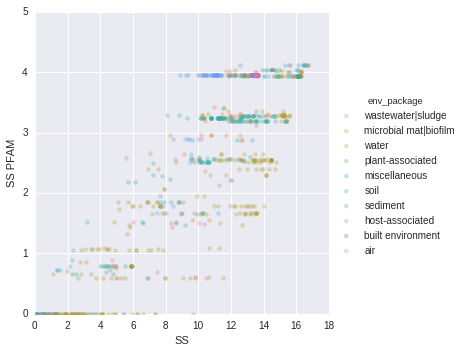

In [14]:
# lmplot crea imágenes de regresión lineal.

# Con la opcción hue le estamos pidiendo que use la columna env_package para colorear los
# puntos

# Con la opción fit_reg=False, le estoy pidiendo que NO ponga las regresiones
sns.lmplot(data=meta_df, x='SS', y='SS PFAM', 
           hue='env_package', 
           fit_reg=False, 
           scatter_kws={'alpha':0.3})
plt.xlim((0, 18))
plt.ylim((0, 5))

plt.savefig('SS_SSpfam_color_scatter.png', dpi=200)

Con el mismo comando, podemos pedirle que separe los datos en diferentes gráficas, usando los datos de la columna env_package

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


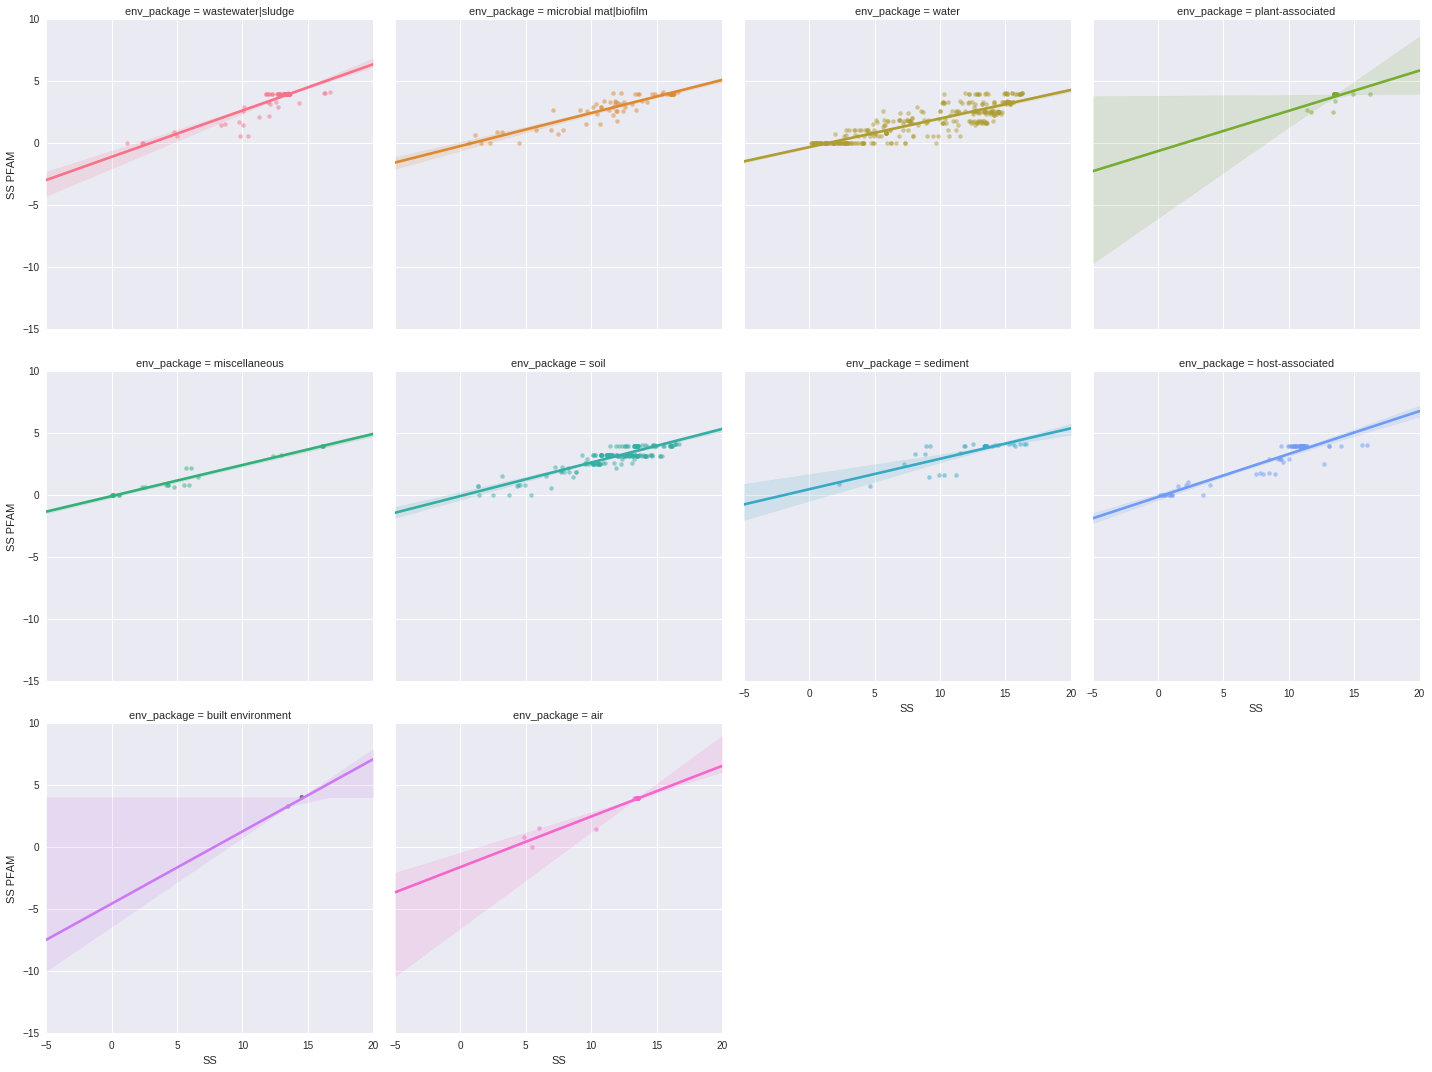

In [15]:
sns.lmplot(data=meta_df, x='SS', y='SS PFAM', 
           hue='env_package',  # las categorias de env_package usando colores
           col='env_package',  # las mismas categorías en las columnas de la gráfica
           col_wrap = 4,       # únicamente 4 columnas de gráficas
           fit_reg=True,       # le pedimos que si ponga la regreción con sus CI
           scatter_kws={'alpha':0.5})

## Scatter plot y regresiones de SS

El módulo _seaborn_ hace las regresiones, pero no encontré como poner los valores en la gráfica. Asi que agregué un código extra para hacerlo.

Para lo cual hay que importar el módulo scipy.stats

In [16]:
from scipy import stats

Hacemos una función que haga todo el analisis y las gráficas. Así ya no tenemos que copiar y pegar todo el tiempo

In [17]:
def plot_reg(x_label, y_label, df, color=None):
    """Easy function to plot the regression of two
    variabels in a df and to draw the values of the 
    analysis. Uses seaborn module and scipy.stats.
    
    Parameters:
    ============
    
    - x_label: string.
               Name of the column in df to plot in x
    - y_label: string
               Name fo the column in df to plot in y
    - df: Pandas DataFrame
    - color: scatter color"""
    # - Calculate linear regression
    reg = stats.linregress(df[x_label], df[y_label])
    # - plot data
    g = sns.regplot(x_label, y_label, data=df, 
                    truncate=True,
                    scatter_kws={'alpha':0.4})
    # - Annotate de regression values
    s = "$r^2 = {:.3}$\n".format(reg.rvalue**2) +\
        "$p-value_r = {:.2}$\n".format(reg.pvalue) +\
        "Model: $y = {:.2}x +{:.2}$".format(reg.slope, reg.intercept)
    plt.annotate(s=s, 
                 xy=(.05, .75), 
                 bbox=dict(boxstyle="round", fc="w"),
                 xycoords='axes fraction')
    return g, reg

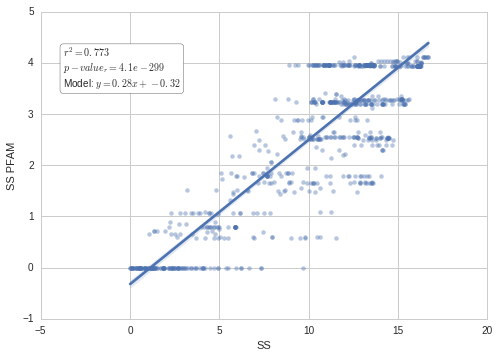

In [19]:
x= 'SS'
y = 'SS PFAM'

with sns.axes_style("whitegrid"):
    plot_reg(x, y, meta_df)
plt.savefig('{}_vs_{}.png'.format(x,y), dpi=200)


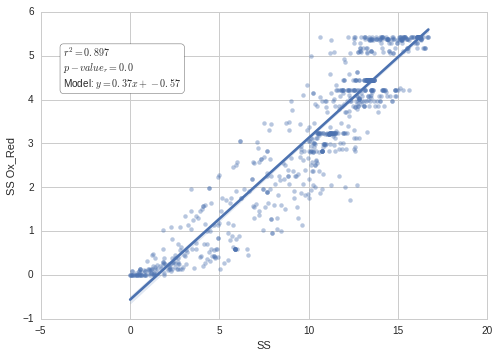

In [20]:
x= 'SS'
y = 'SS Ox_Red'

with sns.axes_style("whitegrid"):
    plot_reg(x, y, meta_df)
plt.savefig('{}_vs_{}.png'.format(x,y), dpi=200)

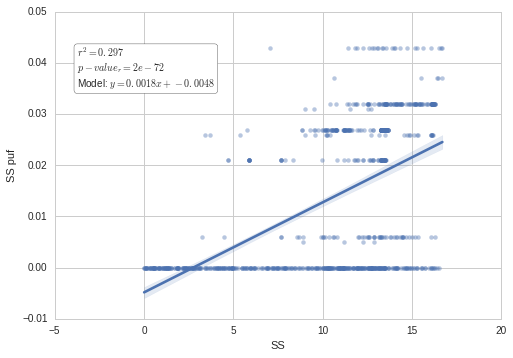

In [21]:
x= 'SS'
y = 'SS puf'

with sns.axes_style("whitegrid"):
    plot_reg(x, y, meta_df)
plt.savefig('{}_vs_{}.png'.format(x,y), dpi=200)

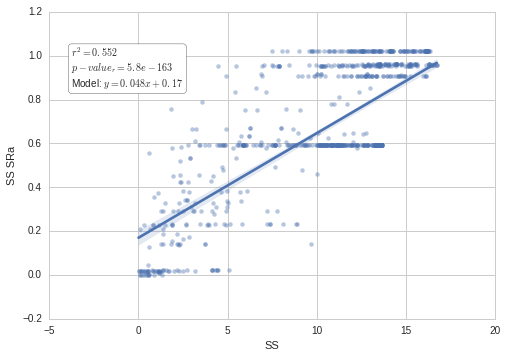

In [22]:
x= 'SS'
y = 'SS SRa'

with sns.axes_style("whitegrid"):
    plot_reg(x, y, meta_df)
plt.savefig('{}_vs_{}.png'.format(x,y), dpi=200)

# Estos scatter solo son para visualizar los datos

In [23]:
if 'Length' in meta_df.columns:
    del meta_df['Length']

In [24]:
columns = ['SS', 'SS PFAM', 'SS Ox_Red', 'SS puf', 'SS SRa']

indices = np.tril_indices(len(columns), k=-1)

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    reg = stats.linregress(meta_df[col1], meta_df[col2])
    print("{:<15}vs {:<15}r-value = {:.4}".format(col1, col2, reg.rvalue**2))

SS PFAM        vs SS             r-value = 0.7734
SS Ox_Red      vs SS             r-value = 0.897
SS Ox_Red      vs SS PFAM        r-value = 0.6137
SS puf         vs SS             r-value = 0.2967
SS puf         vs SS PFAM        r-value = 0.2093
SS puf         vs SS Ox_Red      r-value = 0.3062
SS SRa         vs SS             r-value = 0.5524
SS SRa         vs SS PFAM        r-value = 0.2265
SS SRa         vs SS Ox_Red      r-value = 0.4891
SS SRa         vs SS puf         r-value = 0.08348


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


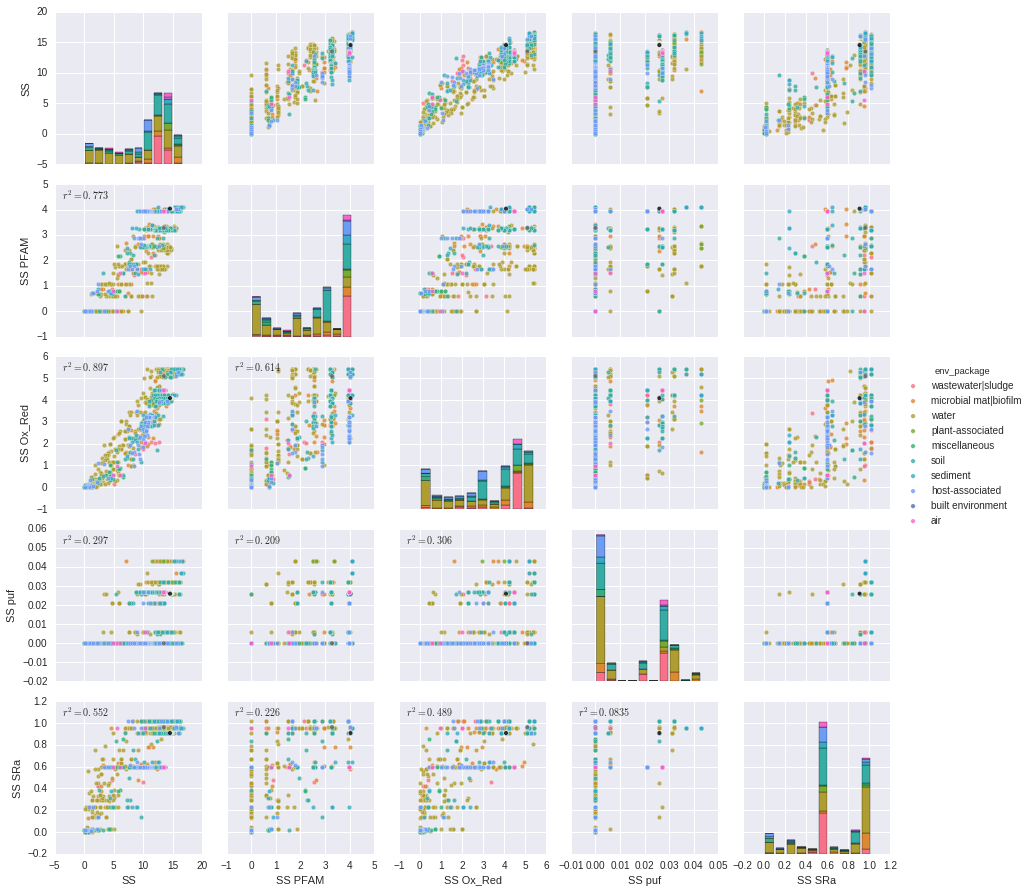

In [25]:
all_scatter = sns.pairplot(data=meta_df,
             hue='env_package',
             plot_kws={'alpha':0.8})

axes = all_scatter.axes

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    ax = axes[i, j]
    reg = stats.linregress(meta_df[col1], meta_df[col2])
    text = "$r^2 = {:.3}$".format(reg.rvalue**2)
    ax.annotate(text, (0.05, 0.9), xycoords='axes fraction')

plt.savefig('scatter_allVSall.png', dpi=300)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


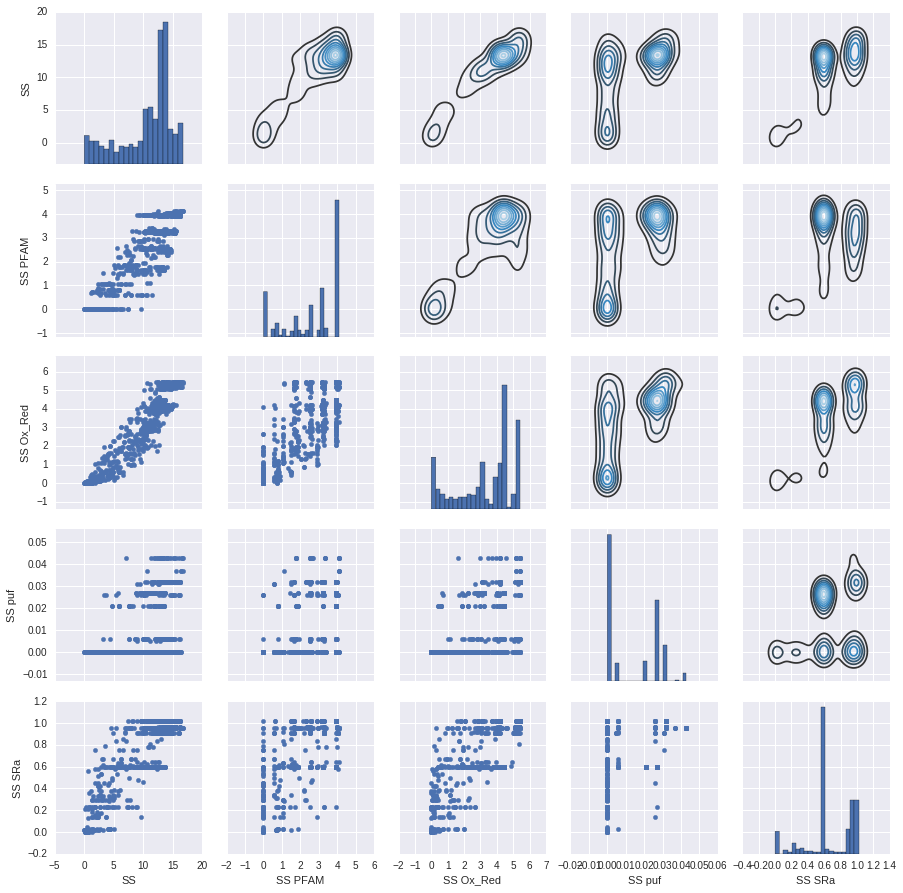

In [26]:
g = sns.PairGrid(meta_df, diag_sharey=False)
g.map_lower(plt.scatter )
g.map_upper(sns.kdeplot, cmap="Blues_d")
g.map_diag(plt.hist, bins=20)

## Metagenomas con mayor SS



In [27]:
columns = ['SS', 'SS PFAM', 'SS Ox_Red', 'SS puf', 'SS SRa']

# calcular los psercentiles
percentiles = []

for col in columns:
    data = meta_df[col]
    perc = np.percentile(data, 95)
    percentiles.append(perc)


In [28]:
# crear las listas de meatgenomas
listas_meta = []

for i, col in enumerate(columns):
    perc = percentiles[i]
    mask = meta_df[col] >= perc
    metas = meta_df.index[mask]
    listas_meta.append(metas)

In [29]:
# número de metagenomas en percentil 95
for i, col in enumerate(columns):
    print(col, ' n95 = {}'.format(len(listas_meta[i])))

SS  n95 = 47
SS PFAM  n95 = 297
SS Ox_Red  n95 = 48
SS puf  n95 = 132
SS SRa  n95 = 141


In [30]:
# tamaño del conjunto interseccion

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    set1 = set(listas_meta[i])
    set2 = set(listas_meta[j])
    union_l = len(set1.intersection(set2))
    print("{:<15}vs {:<15}tamaño de la interseccion = {}".format(col1, col2, union_l))

SS PFAM        vs SS             tamaño de la interseccion = 17
SS Ox_Red      vs SS             tamaño de la interseccion = 23
SS Ox_Red      vs SS PFAM        tamaño de la interseccion = 2
SS puf         vs SS             tamaño de la interseccion = 29
SS puf         vs SS PFAM        tamaño de la interseccion = 14
SS puf         vs SS Ox_Red      tamaño de la interseccion = 44
SS SRa         vs SS             tamaño de la interseccion = 29
SS SRa         vs SS PFAM        tamaño de la interseccion = 0
SS SRa         vs SS Ox_Red      tamaño de la interseccion = 36
SS SRa         vs SS puf         tamaño de la interseccion = 61


In [31]:
temp = {columns[i]: pd.Series(listas_meta[i].get_values())for i in range(len(columns))}
metas95 = pd.DataFrame(temp)
metas95.to_csv('meta_perc95_allscores.tab', sep='\t')

In [32]:
x = meta_df.loc[listas_meta[0]]['feature']

In [33]:
np.unique(x, return_counts=True)


(array(['alkaline salt lake', 'biofilm', 'coast', 'estuarine bulk water',
        'hydrographic feature', 'intertidal zone', 'lake',
        'marine benthic feature', 'marine habitat',
        'marine oligotrophic desert', 'microbial feature',
        'plant-associated habitat', 'prairie', 'soil', 'terrestrial habitat'], dtype=object),
 array([10,  1,  1,  2,  3,  8,  2,  3,  3,  4,  1,  1,  3,  3,  2]))

In [34]:
# voy a dejar las notas por si las flies

for i, col in enumerate(columns):
    data = listas_meta[i]
    subdf = meta_df.loc[data]['feature']
    counts = np.unique(subdf, return_counts=True)
    dica = {'feature': counts[0], 'count': counts[1]}
    newdf = pd.DataFrame(dica)
    col = col.replace(' ', '_')
    newdf.to_csv('{}-metas_perc95.tab'.format(col), sep='\t')